In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #remove warning

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/DBertazioli/NeoMeetup/master/csv/exported_queries/Distribuzione_temporale_eventi_fix_with_members_replica.csv")
df.tail()

,Unnamed: 0,ID,country,state,partecipanti,lat,lon,timezone_str,time,datetime_timezoned
280908,280908,tnndrqyzgbcb,fr,fr,1,48.86,2.34,Europe/Paris,1554130800000,01/04/2019 17
280909,280909,259323127,il,il,2,32.07,34.77,Asia/Jerusalem,1554130800000,01/04/2019 18
280910,280910,260175682,us,fl,1,28.14,-82.61,America/New_York,1554130800000,01/04/2019 11
280911,280911,260102972,us,az,1,32.09,-111.07,America/Phoenix,1554130800000,01/04/2019 08
280912,280912,dlqzpqyzgbcb,us,co,1,39.70,-105.08,America/Denver,1554129000000,01/04/2019 09


In [3]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['dtime'] = tmp[1] #take time
df.head()

,Unnamed: 0,ID,country,state,partecipanti,lat,lon,timezone_str,time,datetime_timezoned,day,dtime
0,0,260269871,us,ca,1,33.87,-118.33,America/Los_Angeles,5317552800000,04/07/2138 10,Friday,10
1,1,260260779,us,wa,2,47.67,-117.43,America/Los_Angeles,3384554400000,01/04/2077 18,Thursday,18
2,2,ztbltqyxcdbbc,us,tn,1,36.08,-86.72,America/Chicago,2150290800000,20/02/2038 09,Saturday,09
3,3,260361735,sg,sg,1,1.30,103.85,Asia/Singapore,1924992000000,01/01/2031 08,Wednesday,08
4,4,260337211,sg,sg,1,1.30,103.85,Asia/Singapore,1924992000000,01/01/2031 08,Wednesday,08


In [4]:
df_date = df[['day','dtime']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime
0,Friday,10
1,Thursday,18
2,Saturday,09
3,Wednesday,08
4,Wednesday,08


In [5]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table

dtime,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Monday,56,10,4,2,5,12,81,171,266,678,...,279,286,367,841,4776,10332,2766,472,104,17
Tuesday,45,4,3,3,5,31,82,516,951,1089,...,412,382,549,1467,9025,17002,4047,718,95,50
Wednesday,39,6,6,8,5,24,107,808,1099,1315,...,484,464,543,1568,9910,17734,4290,621,142,40
Thursday,52,9,4,2,4,31,106,612,1191,1188,...,542,473,664,1721,9620,17656,4331,861,198,71
Friday,121,10,4,7,12,22,112,427,754,1079,...,528,611,706,1494,4581,9104,4312,1330,646,182
Saturday,145,42,23,20,20,60,269,1041,2597,6183,...,4741,3330,2416,2271,3317,5701,3264,1072,663,215
Sunday,77,15,11,14,9,39,127,465,1210,2690,...,4384,3076,2232,2007,2158,2468,778,232,80,64


In [6]:
#only if are present nan or float 
#pivot_table = pivot_table.fillna(0)
#pivot_table = pivot_table.astype(int)

In [6]:
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size

Text(141,0.5,'Weekdays')

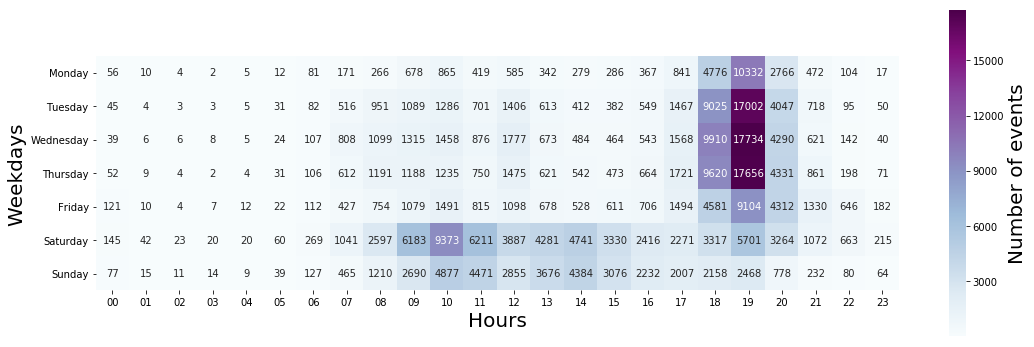

In [7]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)

In [9]:
#figure.figure.savefig("C:/Users/fabri/OneDrive/Desktop/heatmap.png")

In [8]:
df_date = df[['day','dtime', 'partecipanti']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime,partecipanti
0,Friday,10,1
1,Thursday,18,2
2,Saturday,09,1
3,Wednesday,08,1
4,Wednesday,08,1


In [9]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week
df_date.head()

,day,dtime,partecipanti
0,Friday,10,1
1,Thursday,18,2
2,Saturday,09,1
3,Wednesday,08,1
4,Wednesday,08,1


In [10]:
df_day = df[['day','partecipanti']].groupby('day', as_index = False).sum()
df_time = df[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
df_day

,day,partecipanti
0,Friday,126261
1,Monday,101700
2,Saturday,268015
3,Sunday,157555
4,Thursday,210401
5,Tuesday,195264
6,Wednesday,212696


Text(0.5,0,'Participants')

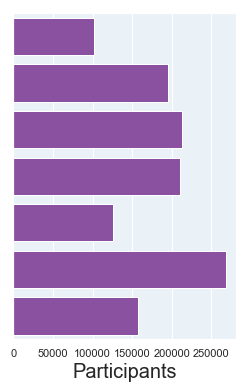

In [11]:
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1 = sns.barplot('partecipanti', 'day', data = df_day, color = '#8E44AD', order = ['Monday', 'Tuesday', 'Wednesday',
                                                                               'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax1.set_ylabel('')
ax1.set(yticklabels = [])
ax1.set_xlabel("Participants", fontsize = 20)

Text(0,0.5,'Participants')

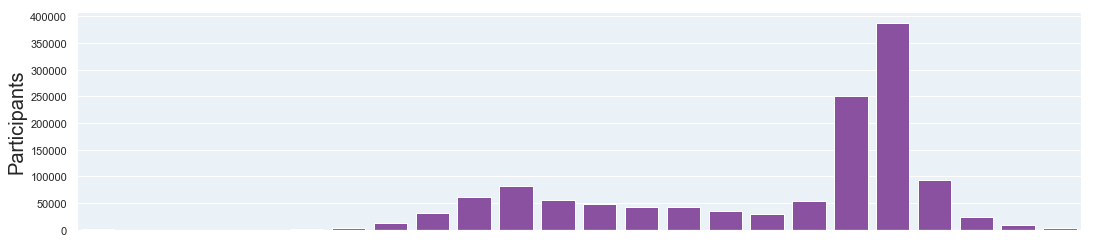

In [12]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax = sns.barplot('dtime', 'partecipanti', data = df_time, color = '#8E44AD')
ax.set_xlabel('')
ax.set(xticklabels = [])
ax.set_ylabel("Participants", fontsize = 20)

## Define European countries

In [18]:
#european countries
df_ita = df[df.country == "it"] #italia
df_de = df[df.country == "de"] #germania
df_es = df[df.country == "es"] #spagna
df_fr = df[df.country == "fr"] #francia
df_gb = df[df.country == "gb"] #gran bretagna
df_nl = df[df.country == "nl"] #olanda
df_fi = df[df.country == "fi"] #finlandia
df_pt = df[df.country == "pt"] #portogallo
df_se = df[df.country == "se"] #svezia

####NB####
#heat_siglapaese heatmap
#ax1_siglapaese barplot dx
#ax2_siglapaese barplot sup 

## Italia

Text(138.453125, 0.5, 'Weekdays')

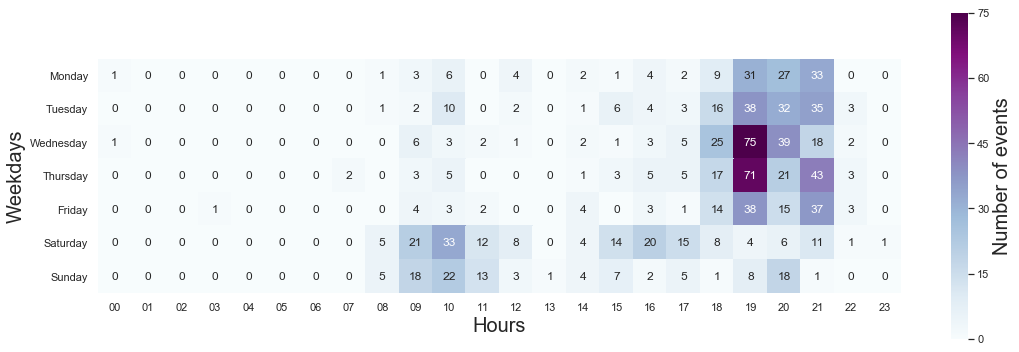

In [119]:
df_ita_date = df_ita[['day','dtime']] #define new dataframe for explore with viz
df_ita_date.head() #check
df_ita_date['day'] = pd.Categorical(df_ita_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_ita_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_ita_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_ita = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_ita.figure.axes[-1].yaxis.label.set_size(20)
heat_ita.set_xlabel("Hours", fontsize=20)
heat_ita.set_ylabel("Weekdays", fontsize=20)

In [20]:
#heat_ita.figure.savefig("C:/Users/Massi/Desktop/temp/heatmap_ita.png")

Text(0.5, 0, 'Participants')

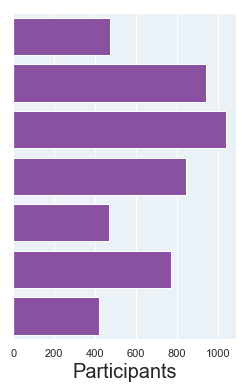

In [120]:
df_ita_date = df_ita[['day','dtime', 'partecipanti']]
df_ita_date['day'] = pd.Categorical(df_ita_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_ita_day = df_ita[['day','partecipanti']].groupby('day', as_index = False).sum()
df_ita_time = df_ita[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_ita = sns.barplot('partecipanti', 'day', data = df_ita_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_ita.set_ylabel('')
ax1_ita.set(yticklabels = [])
ax1_ita.set_xlabel("Participants", fontsize = 20)

In [22]:
#ax1_ita.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_ita.png")

In [122]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_ita_time = df_ita_time.append(df_temp)
df_ita_time = df_ita_time.sort_values(by=['dtime','partecipanti'])
df_ita_time = df_ita_time.drop_duplicates(subset='dtime', keep = 'last')
df_ita_time

,dtime,partecipanti
0,00,6
1,01,0
2,02,0
1,03,1
3,04,0
4,05,0
5,06,0
2,07,4
3,08,25
4,09,138


Text(0, 0.5, 'Participants')

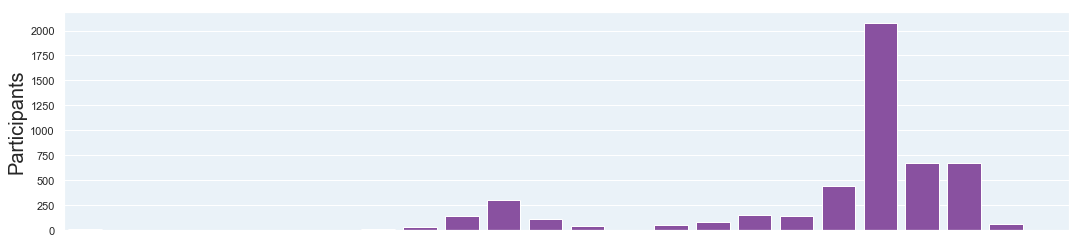

In [123]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_ita = sns.barplot('dtime', 'partecipanti', data = df_ita_time, color = '#8E44AD')
ax2_ita.set_xlabel('')
ax2_ita.set(xticklabels = [])
ax2_ita.set_ylabel("Participants", fontsize = 20)

In [124]:
ax2_ita.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_ita.png")

## Germania

Text(138.453125, 0.5, 'Weekdays')

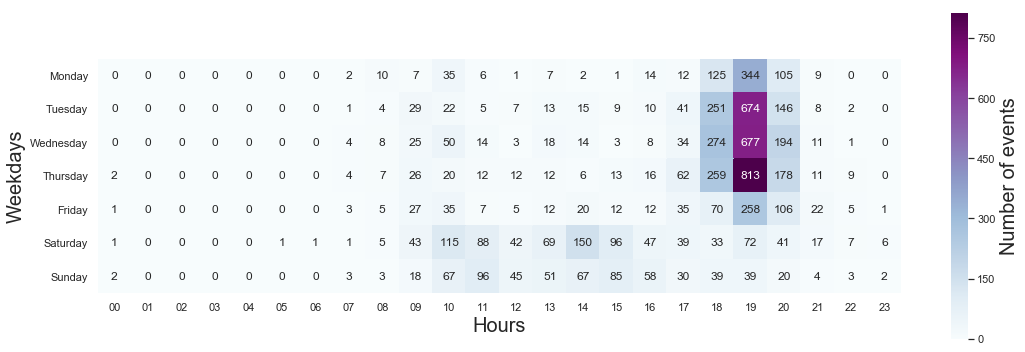

In [19]:
df_de_date = df_de[['day','dtime']] #define new dataframe for explore with viz
df_de_date.head() #check
df_de_date['day'] = pd.Categorical(df_de_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_de_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_de_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_de = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_de.figure.axes[-1].yaxis.label.set_size(20)
heat_de.set_xlabel("Hours", fontsize=20)
heat_de.set_ylabel("Weekdays", fontsize=20)

In [26]:
#heat_de.figure.savefig("C:/Users/Massi/Desktop/temp/heat_de.png")

Text(0.5, 0, 'Participants')

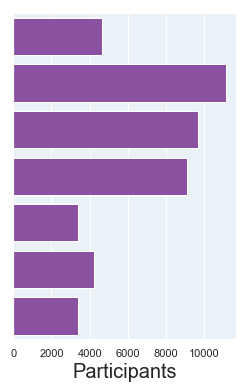

In [20]:
df_de_date = df_de[['day','dtime', 'partecipanti']]
df_de_date['day'] = pd.Categorical(df_de_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_de_day = df_de[['day','partecipanti']].groupby('day', as_index = False).sum()
df_de_time = df_de[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_de = sns.barplot('partecipanti', 'day', data = df_de_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_de.set_ylabel('')
ax1_de.set(yticklabels = [])
ax1_de.set_xlabel("Participants", fontsize = 20)

In [28]:
#ax1_de.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_de.png")

In [21]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_de_time = df_de_time.append(df_temp)
df_de_time = df_de_time.sort_values(by=['dtime','partecipanti'])
df_de_time = df_de_time.drop_duplicates(subset='dtime', keep = 'last')
df_de_time

,dtime,partecipanti
0,00,30
1,01,0
2,02,0
3,03,0
4,04,0
1,05,2
2,06,5
3,07,32
4,08,164
5,09,838


Text(0, 0.5, 'Participants')

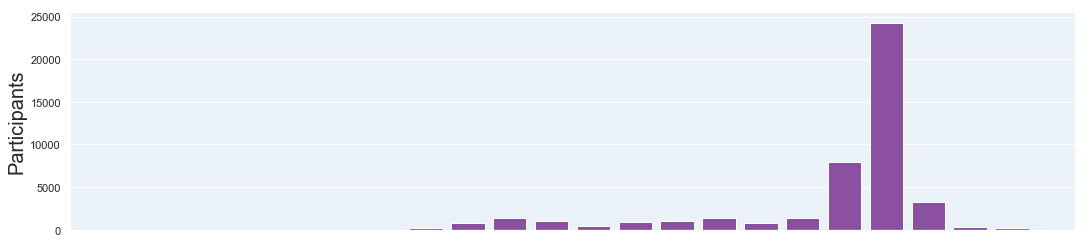

In [22]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_de = sns.barplot('dtime', 'partecipanti', data = df_de_time, color = '#8E44AD')
ax2_de.set_xlabel('')
ax2_de.set(xticklabels = [])
ax2_de.set_ylabel("Participants", fontsize = 20)

In [23]:
ax2_de.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_de.png")

## Spagna

Text(138.453125, 0.5, 'Weekdays')

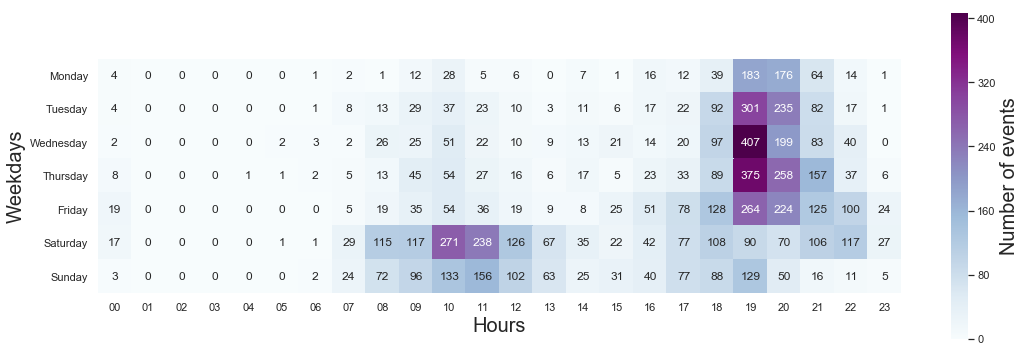

In [24]:
df_es_date = df_es[['day','dtime']] #define new dataframe for explore with viz
df_es_date.head() #check
df_es_date['day'] = pd.Categorical(df_es_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_es_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_es_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_es = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_es.figure.axes[-1].yaxis.label.set_size(20)
heat_es.set_xlabel("Hours", fontsize=20)
heat_es.set_ylabel("Weekdays", fontsize=20)

In [33]:
#heat_es.figure.savefig("C:/Users/Massi/Desktop/temp/heat_es.png")

Text(0.5, 0, 'Participants')

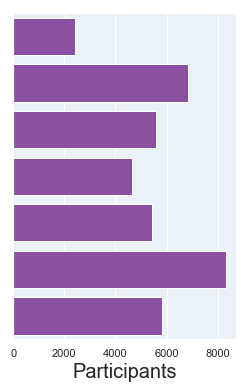

In [25]:
df_es_date = df_es[['day','dtime', 'partecipanti']]
df_es_date['day'] = pd.Categorical(df_es_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_es_day = df_es[['day','partecipanti']].groupby('day', as_index = False).sum()
df_es_time = df_es[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_es = sns.barplot('partecipanti', 'day', data = df_es_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_es.set_ylabel('')
ax1_es.set(yticklabels = [])
ax1_es.set_xlabel("Participants", fontsize = 20)

In [35]:
#ax1_es.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_es.png")

In [26]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_es_time = df_es_time.append(df_temp)
df_es_time = df_es_time.sort_values(by=['dtime','partecipanti'])
df_es_time = df_es_time.drop_duplicates(subset='dtime', keep = 'last')
df_es_time

,dtime,partecipanti
0,00,207
1,01,0
2,02,0
3,03,0
1,04,1
2,05,16
3,06,13
4,07,319
5,08,1252
6,09,2038


Text(0, 0.5, 'Participants')

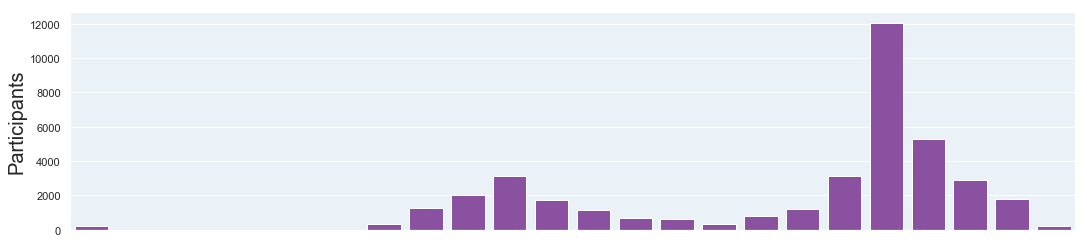

In [27]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_es = sns.barplot('dtime', 'partecipanti', data = df_es_time, color = '#8E44AD')
ax2_es.set_xlabel('')
ax2_es.set(xticklabels = [])
ax2_es.set_ylabel("Participants", fontsize = 20)

In [28]:
ax2_es.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_es.png")

## Francia

Text(138.453125, 0.5, 'Weekdays')

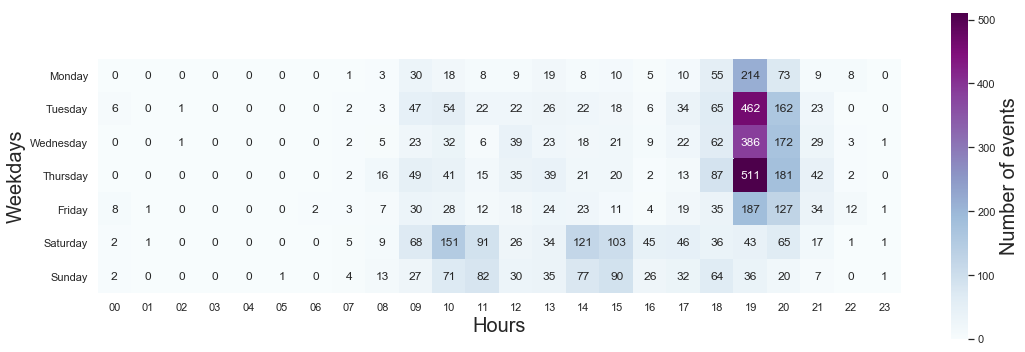

In [29]:
df_fr_date = df_fr[['day','dtime']] #define new dataframe for explore with viz
df_fr_date.head() #check
df_fr_date['day'] = pd.Categorical(df_fr_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_fr_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_fr_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_fr = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_fr.figure.axes[-1].yaxis.label.set_size(20)
heat_fr.set_xlabel("Hours", fontsize=20)
heat_fr.set_ylabel("Weekdays", fontsize=20)

In [39]:
#heat_fr.figure.savefig("C:/Users/Massi/Desktop/temp/heat_fr.png")

Text(0.5, 0, 'Participants')

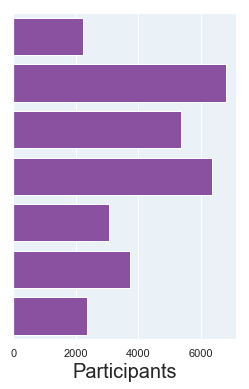

In [30]:
df_fr_date = df_fr[['day','dtime', 'partecipanti']]
df_fr_date['day'] = pd.Categorical(df_fr_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_fr_day = df_fr[['day','partecipanti']].groupby('day', as_index = False).sum()
df_fr_time = df_fr[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_fr = sns.barplot('partecipanti', 'day', data = df_fr_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_fr.set_ylabel('')
ax1_fr.set(yticklabels = [])
ax1_fr.set_xlabel("Participants", fontsize = 20)

In [41]:
#ax1_fr.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_fr.png")

In [31]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_fr_time = df_fr_time.append(df_temp)
df_fr_time = df_fr_time.sort_values(by=['dtime','partecipanti'])
df_fr_time = df_fr_time.drop_duplicates(subset='dtime', keep = 'last')
df_fr_time

,dtime,partecipanti
0,00,34
1,01,2
2,02,7
3,03,0
4,04,0
3,05,1
4,06,2
5,07,136
6,08,192
7,09,1226


Text(0, 0.5, 'Participants')

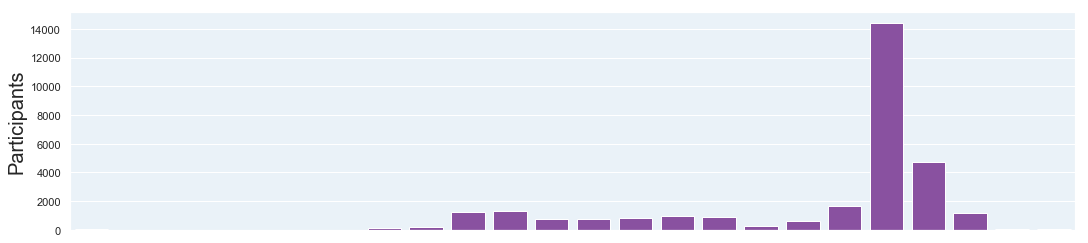

In [32]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_fr = sns.barplot('dtime', 'partecipanti', data = df_fr_time, color = '#8E44AD')
ax2_fr.set_xlabel('')
ax2_fr.set(xticklabels = [])
ax2_fr.set_ylabel("Participants", fontsize = 20)

In [33]:
ax2_fr.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_fr.png")

# Gran Bretagna

Text(138.453125, 0.5, 'Weekdays')

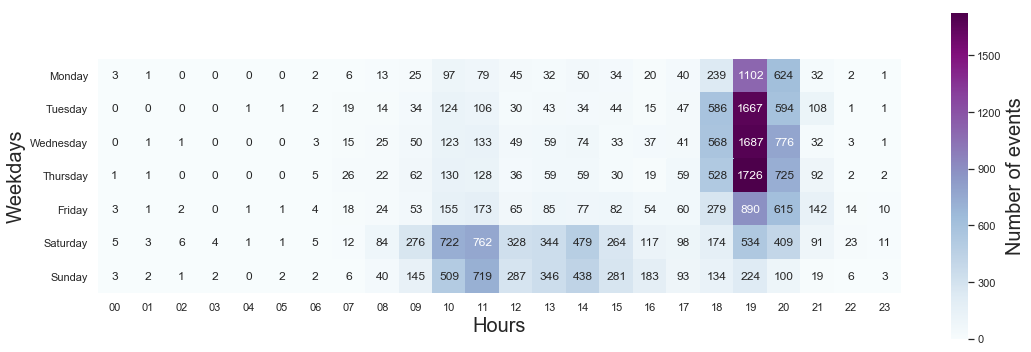

In [44]:
df_gb_date = df_gb[['day','dtime']] #define new dataframe for explore with viz
df_gb_date.head() #check
df_gb_date['day'] = pd.Categorical(df_gb_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_gb_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_gb_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_gb = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_gb.figure.axes[-1].yaxis.label.set_size(20)
heat_gb.set_xlabel("Hours", fontsize=20)
heat_gb.set_ylabel("Weekdays", fontsize=20)

In [45]:
#heat_gb.figure.savefig("C:/Users/Massi/Desktop/temp/heat_gb.png")

Text(0.5, 0, 'Participants')

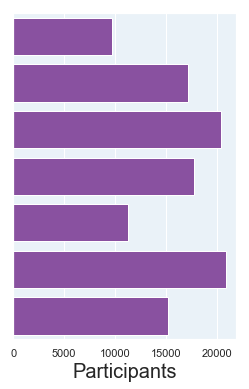

In [46]:
df_gb_date = df_gb[['day','dtime', 'partecipanti']]
df_gb_date['day'] = pd.Categorical(df_gb_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_gb_day = df_gb[['day','partecipanti']].groupby('day', as_index = False).sum()
df_gb_time = df_gb[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_gb = sns.barplot('partecipanti', 'day', data = df_gb_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_gb.set_ylabel('')
ax1_gb.set(yticklabels = [])
ax1_gb.set_xlabel("Participants", fontsize = 20)

In [47]:
#ax1_gb.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_gb.png")

In [135]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_gb_time = df_gb_time.append(df_temp)
df_gb_time = df_gb_time.sort_values(by=['dtime','partecipanti'])
df_gb_time = df_gb_time.drop_duplicates(subset='dtime', keep = 'last')
df_gb_time

,dtime,partecipanti
0,00,39
1,01,28
2,02,18
3,03,50
4,04,3
5,05,6
6,06,68
7,07,182
8,08,1008
9,09,2757


Text(0, 0.5, 'Participants')

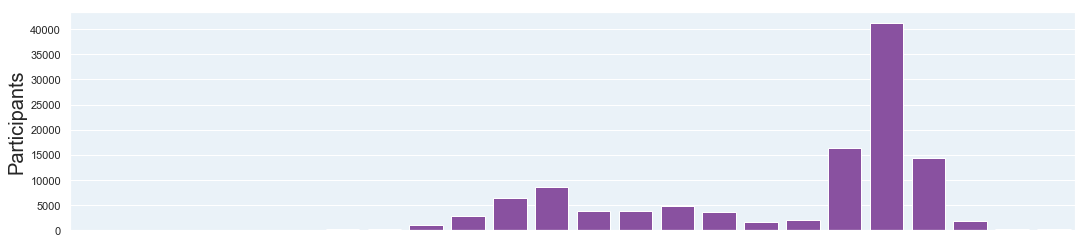

In [136]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_gb = sns.barplot('dtime', 'partecipanti', data = df_gb_time, color = '#8E44AD')
ax2_gb.set_xlabel('')
ax2_gb.set(xticklabels = [])
ax2_gb.set_ylabel("Participants", fontsize = 20)

In [137]:
ax2_gb.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_gb.png")

# Olanda

Text(138.453125, 0.5, 'Weekdays')

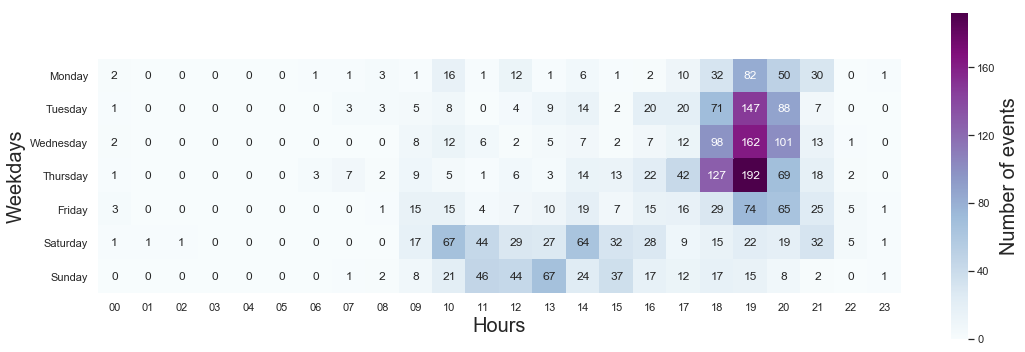

In [34]:
df_nl_date = df_nl[['day','dtime']] #define new dataframe for explore with viz
df_nl_date.head() #check
df_nl_date['day'] = pd.Categorical(df_nl_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_nl_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_nl_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_nl = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_nl.figure.axes[-1].yaxis.label.set_size(20)
heat_nl.set_xlabel("Hours", fontsize=20)
heat_nl.set_ylabel("Weekdays", fontsize=20)

In [51]:
#heat_nl.figure.savefig("C:/Users/Massi/Desktop/temp/heat_nl.png")

Text(0.5, 0, 'Participants')

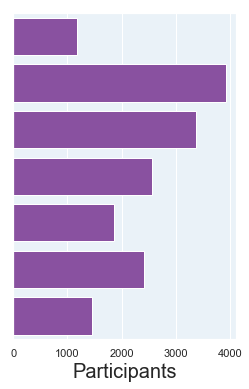

In [35]:
df_nl_date = df_nl[['day','dtime', 'partecipanti']]
df_nl_date['day'] = pd.Categorical(df_nl_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_nl_day = df_nl[['day','partecipanti']].groupby('day', as_index = False).sum()
df_nl_time = df_nl[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_nl = sns.barplot('partecipanti', 'day', data = df_nl_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_nl.set_ylabel('')
ax1_nl.set(yticklabels = [])
ax1_nl.set_xlabel("Participants", fontsize = 20)

In [53]:
#ax1_nl.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_nl.png")

In [36]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_nl_time = df_nl_time.append(df_temp)
df_nl_time = df_nl_time.sort_values(by=['dtime','partecipanti'])
df_nl_time = df_nl_time.drop_duplicates(subset='dtime', keep = 'last')
df_nl_time

,dtime,partecipanti
0,00,25
1,01,4
2,02,1
3,03,0
4,04,0
5,05,0
3,06,5
4,07,15
5,08,17
6,09,370


Text(0, 0.5, 'Participants')

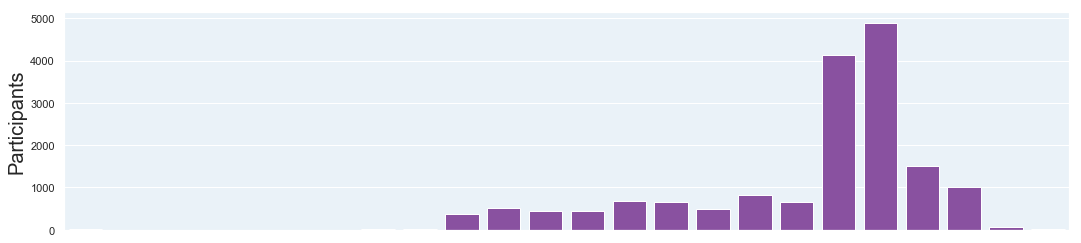

In [37]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_nl = sns.barplot('dtime', 'partecipanti', data = df_nl_time, color = '#8E44AD')
ax2_nl.set_xlabel('')
ax2_nl.set(xticklabels = [])
ax2_nl.set_ylabel("Participants", fontsize = 20)

In [38]:
ax2_nl.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_nl.png")

# Portogallo

Text(138.453125, 0.5, 'Weekdays')

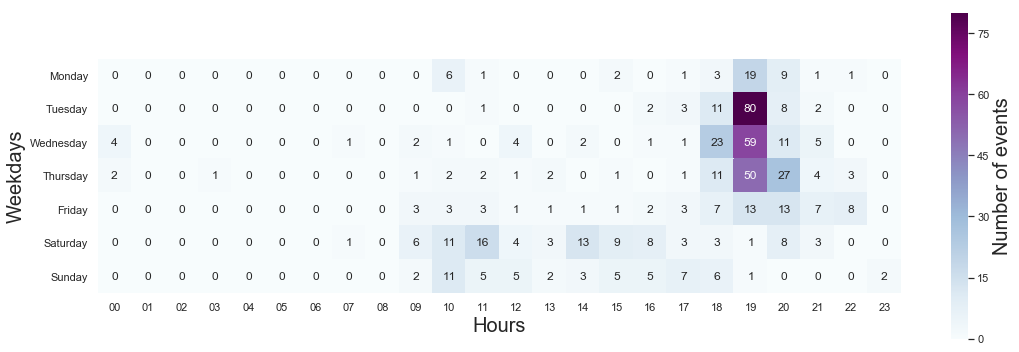

In [57]:
df_pt_date = df_pt[['day','dtime']] #define new dataframe for explore with viz
df_pt_date.head() #check
df_pt_date['day'] = pd.Categorical(df_pt_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_pt_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_pt_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_pt = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_pt.figure.axes[-1].yaxis.label.set_size(20)
heat_pt.set_xlabel("Hours", fontsize=20)
heat_pt.set_ylabel("Weekdays", fontsize=20)

In [59]:
#heat_pt.figure.savefig("C:/Users/Massi/Desktop/temp/heat_pt.png")

Text(0.5, 0, 'Participants')

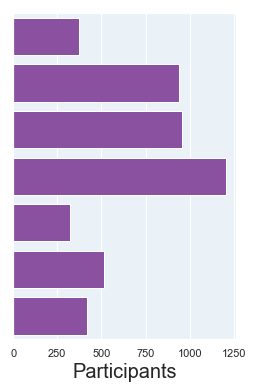

In [58]:
df_pt_date = df_pt[['day','dtime', 'partecipanti']]
df_pt_date['day'] = pd.Categorical(df_pt_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_pt_day = df_pt[['day','partecipanti']].groupby('day', as_index = False).sum()
df_pt_time = df_pt[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_pt = sns.barplot('partecipanti', 'day', data = df_pt_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_pt.set_ylabel('')
ax1_pt.set(yticklabels = [])
ax1_pt.set_xlabel("Participants", fontsize = 20)

In [60]:
#ax1_pt.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_pt.png")

In [141]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_pt_time = df_pt_time.append(df_temp)
df_pt_time = df_pt_time.sort_values(by=['dtime','partecipanti'])
df_pt_time = df_pt_time.drop_duplicates(subset='dtime', keep = 'last')
df_pt_time

,dtime,partecipanti
0,00,13
1,01,0
2,02,0
1,03,3
3,04,0
4,05,0
5,06,0
2,07,2
7,08,0
3,09,102


Text(0, 0.5, 'Participants')

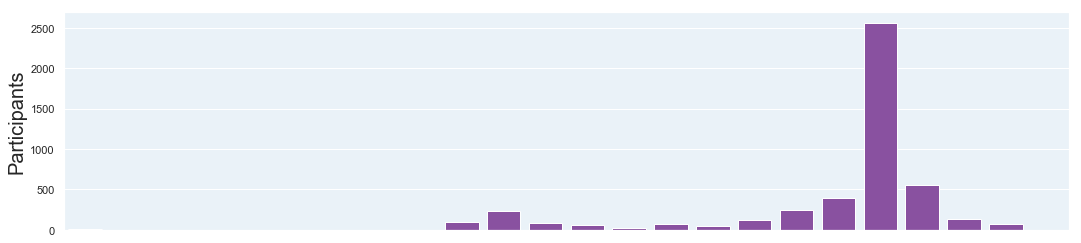

In [142]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_pt = sns.barplot('dtime', 'partecipanti', data = df_pt_time, color = '#8E44AD')
ax2_pt.set_xlabel('')
ax2_pt.set(xticklabels = [])
ax2_pt.set_ylabel("Participants", fontsize = 20)

In [143]:
ax2_pt.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_pt.png")

# Svezia

Text(138.453125, 0.5, 'Weekdays')

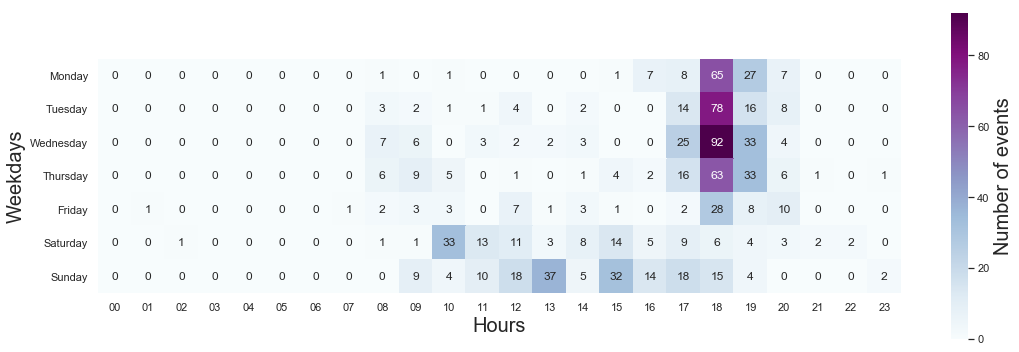

In [39]:
df_se_date = df_se[['day','dtime']] #define new dataframe for explore with viz
df_se_date.head() #check
df_se_date['day'] = pd.Categorical(df_se_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_se_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_se_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_se = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_se.figure.axes[-1].yaxis.label.set_size(20)
heat_se.set_xlabel("Hours", fontsize=20)
heat_se.set_ylabel("Weekdays", fontsize=20)

In [64]:
#heat_se.figure.savefig("C:/Users/Massi/Desktop/temp/heat_se.png")

Text(0.5, 0, 'Participants')

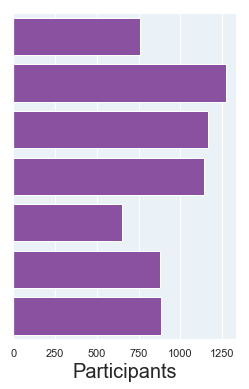

In [40]:
df_se_date = df_se[['day','dtime', 'partecipanti']]
df_se_date['day'] = pd.Categorical(df_se_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_se_day = df_se[['day','partecipanti']].groupby('day', as_index = False).sum()
df_se_time = df_se[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_se = sns.barplot('partecipanti', 'day', data = df_se_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_se.set_ylabel('')
ax1_se.set(yticklabels = [])
ax1_se.set_xlabel("Participants", fontsize = 20)

In [67]:
#ax1_se.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_se.png")

In [41]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_se_time = df_se_time.append(df_temp)
df_se_time = df_se_time.sort_values(by=['dtime','partecipanti'])
df_se_time = df_se_time.drop_duplicates(subset='dtime', keep = 'last')
df_se_time

,dtime,partecipanti
0,00,0
0,01,1
1,02,11
3,03,0
4,04,0
5,05,0
6,06,0
2,07,3
3,08,144
4,09,210


Text(0, 0.5, 'Participants')

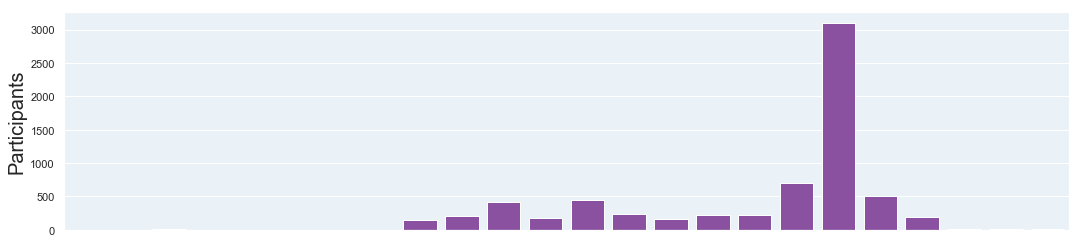

In [42]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_se = sns.barplot('dtime', 'partecipanti', data = df_se_time, color = '#8E44AD')
ax2_se.set_xlabel('')
ax2_se.set(xticklabels = [])
ax2_se.set_ylabel("Participants", fontsize = 20)

In [43]:
ax2_se.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_se.png")

# Finlandia

Text(138.453125, 0.5, 'Weekdays')

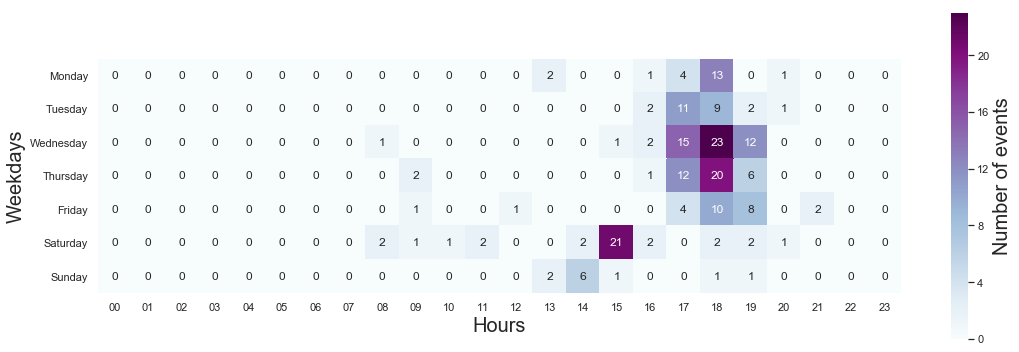

In [44]:
df_fi_date = df_fi[['day','dtime']] #define new dataframe for explore with viz
df_fi_date.head() #check
df_fi_date['day'] = pd.Categorical(df_fi_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_fi_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_fi_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
columnsTitles = ['00','01','02','03','04','05','06','07','08','09','10',
                 '11','12','13','14','15','16','17','18','19','20','21','22','23']
pivot_table = pivot_table.reindex(columns=columnsTitles)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
heat_fi = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
heat_fi.figure.axes[-1].yaxis.label.set_size(20)
heat_fi.set_xlabel("Hours", fontsize=20)
heat_fi.set_ylabel("Weekdays", fontsize=20)

In [72]:
#heat_fi.figure.savefig("C:/Users/Massi/Desktop/temp/heat_fi.png")

Text(0.5, 0, 'Participants')

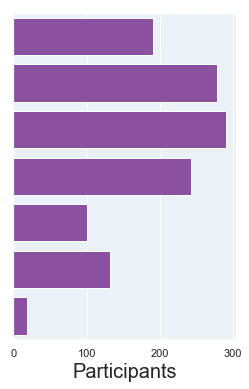

In [45]:
df_fi_date = df_fi[['day','dtime', 'partecipanti']]
df_fi_date['day'] = pd.Categorical(df_fi_date['day'],
                                ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_fi_day = df_fi[['day','partecipanti']].groupby('day', as_index = False).sum()
df_fi_time = df_fi[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1_fi = sns.barplot('partecipanti', 'day', data = df_fi_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1_fi.set_ylabel('')
ax1_fi.set(yticklabels = [])
ax1_fi.set_xlabel("Participants", fontsize = 20)

In [75]:
#ax1_fi.figure.savefig("C:/Users/Massi/Desktop/temp/ax1_fi.png")

In [46]:
df_temp = pd.DataFrame({'dtime':['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16',
                                '17','18','19','20','21','22','23'],
                       'partecipanti':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_fi_time = df_fi_time.append(df_temp)
df_fi_time = df_fi_time.sort_values(by=['dtime','partecipanti'])
df_fi_time = df_fi_time.drop_duplicates(subset='dtime', keep = 'last')
df_fi_time

,dtime,partecipanti
0,00,0
1,01,0
2,02,0
3,03,0
4,04,0
5,05,0
6,06,0
7,07,0
0,08,6
1,09,15


Text(0, 0.5, 'Participants')

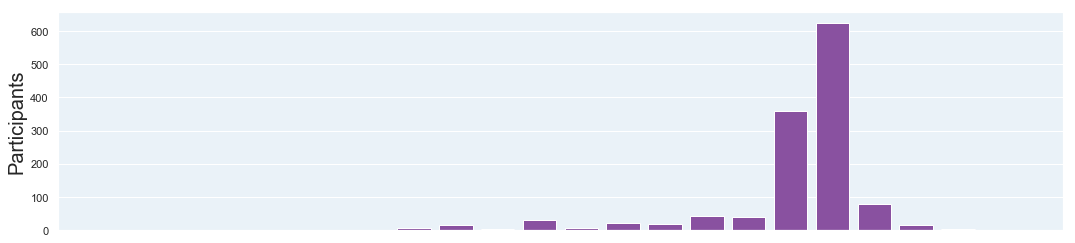

In [47]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax2_fi = sns.barplot('dtime', 'partecipanti', data = df_fi_time, color = '#8E44AD')
ax2_fi.set_xlabel('')
ax2_fi.set(xticklabels = [])
ax2_fi.set_ylabel("Participants", fontsize = 20)

In [48]:
ax2_fi.figure.savefig("C:/Users/Massi/Desktop/temp/ax2_fi.png")